## Spectral Representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from math import sqrt

from tqdm import tqdm

#### 1)  

Σχόλια :

- Στην περίπτωση που είχαμε να αντιμετωπίσουμε είχαμε one-sided power-spectrum οπότε κάναμε χρήση του εξής τύπου :

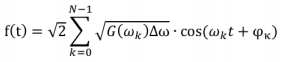


In [2]:
N = 100

delta_omega = 3 / N

omega_k = []

G_w = []

t = np.linspace(0, 10, 200)

In [3]:
def G(x):
    if (1 <= x and x <= 2): 
        return x - 1
    elif (2 < x and x <= 3): 
        return 3 - x
    else: 
        return 0

In [4]:
for i in range(N):
    omega_k.append(i*delta_omega)
    G_w.append(G(i*delta_omega))

In [5]:
def Realizations(n_Realizations,N=N,delta_omega=delta_omega,omega_k=omega_k,G_w=G_w,t=t):
    realizations=[]
    for i in tqdm(range(n_Realizations),total=n_Realizations):
        phi= np.random.uniform(low=0, high = 2*np.pi, size = N)
        Sum=[]
        
        for k in range(N):
            s = sqrt(G_w[k] * delta_omega) * np.cos(omega_k[k] * t + phi[k])
            Sum.append(s)
        Sum=sqrt(2) * np.sum(Sum,axis=0)
        
        realizations.append(Sum)
        
    return realizations

In [6]:
real_50=Realizations(50)
real_500=Realizations(500)
real_1000=Realizations(1000)
real_5000=Realizations(5000)
real_10000=Realizations(10000)
real_50000=Realizations(50000)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:49<00:00, 457.34it/s]


#### 2)

In [7]:
mu_50 = np.mean(real_50, axis = 0)
var_50 = np.var(real_50, axis = 0)

mu_500 = np.mean(real_500, axis = 0)
var_500 = np.var(real_500, axis = 0)

mu_1000 = np.mean(real_1000, axis = 0)
var_1000 = np.var(real_1000, axis = 0)

mu_5000 = np.mean(real_5000, axis = 0)
var_5000 = np.var(real_5000, axis = 0)

mu_10000 = np.mean(real_10000, axis = 0)
var_10000 = np.var(real_10000, axis = 0)

mu_50000 = np.mean(real_50000, axis = 0)
var_50000 = np.var(real_50000, axis = 0)

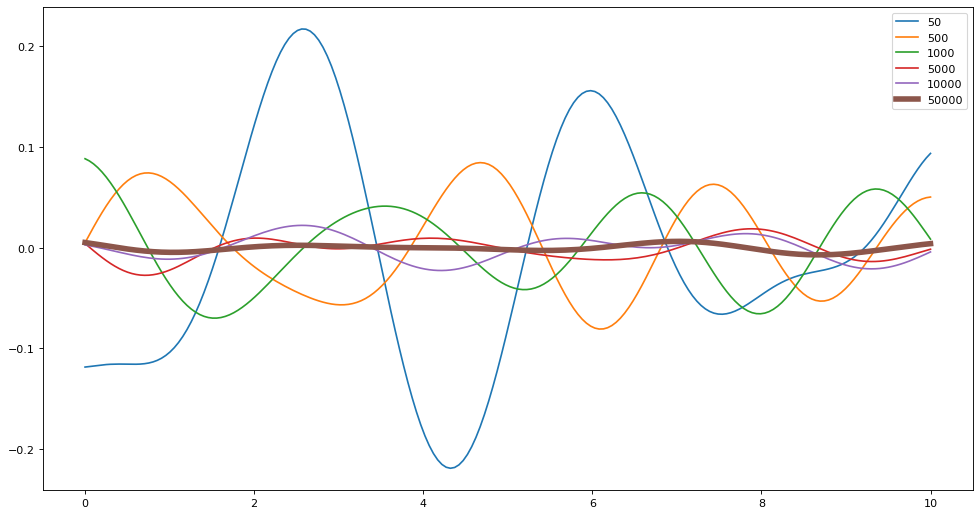

In [8]:
figure(figsize=(15, 8), dpi=80)
plt.plot(t, mu_50, label = "50")
plt.plot(t, mu_500, label = "500")
plt.plot(t, mu_1000, label = "1000")
plt.plot(t, mu_5000, label = "5000")
plt.plot(t, mu_10000, label = "10000")
plt.plot(t, mu_50000, label = "50000",linewidth=5)

plt.legend()

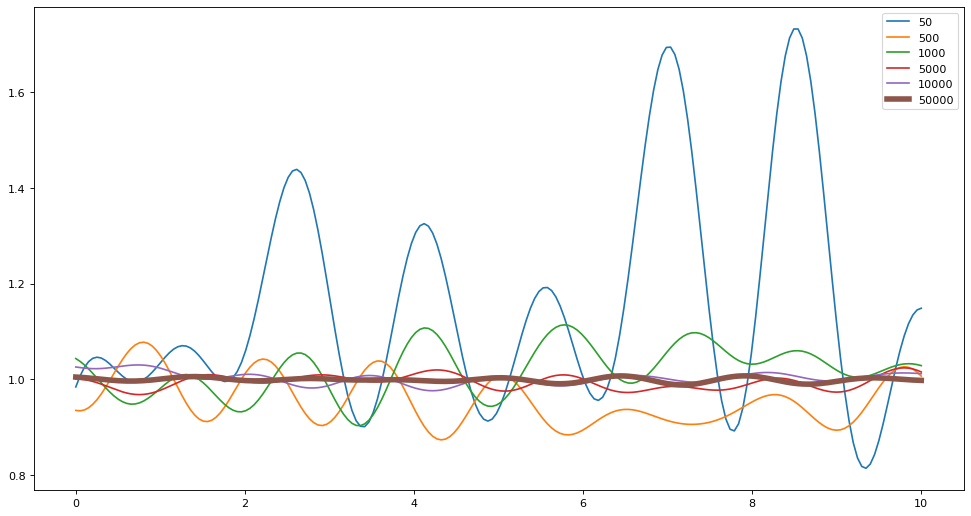

In [9]:
figure(figsize=(15, 8), dpi=80)
plt.plot(t, var_50, label = "50")
plt.plot(t, var_500, label = "500")
plt.plot(t, var_1000, label = "1000")
plt.plot(t, var_5000, label = "5000")
plt.plot(t, var_10000, label = "10000")
plt.plot(t, var_50000, label = "50000",linewidth=5)

plt.legend()

#### Σχόλια:

- Γνωρίζουμε από εκφώνηση ότι η Χ(t) είναι zero mean 
- Γνωρίζουμε επίσης ότι η διασπορά μπορεί να βρεθεί από τον τύπο :


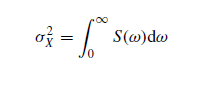 , δηλαδή αρκεί να βρούμε το εμβαδόν της G(ω), που σύμφωνα με το παρακάτω plot είναι ίσο με 1.

- Παρατηρούμε ότι όσο αυξάνεται το πλήθος των Realizations τότε συγκλίνουν οι τιμές μας στις θεωρητικές τιμές , δηλαδή στο 0 και το 1 αντίστοιχα.


##### Εμβαδον

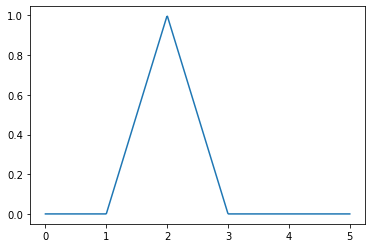

In [10]:
x = np.linspace(0, 5, 500)
y = []
for i in range(len(x)):
    y.append(G(x[i]))

plt.plot(x, y)

#### 3)

In [11]:
r_idx = np.random.choice(range(5000))
print("Temporal Average",np.mean(real_5000[r_idx]),"\n")
print("Temporal Variance",np.var(real_5000[r_idx]))

Temporal Average 0.04201422927519394 

Temporal Variance 0.5423135877408524


In [12]:
temp_mu_5000 = []
temp_var_5000 = []
for i in range(5000):
    temp_mu_5000.append(np.mean(real_5000[i]))
    temp_var_5000.append(np.var(real_5000[i]))

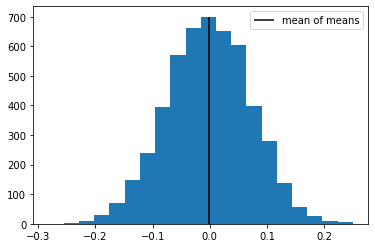

In [13]:
plt.hist(temp_mu_5000, bins = 20)
plt.vlines(np.mean(temp_mu_5000), ymin = 0, ymax = 700,label = "mean of means")
plt.legend()
plt.show()

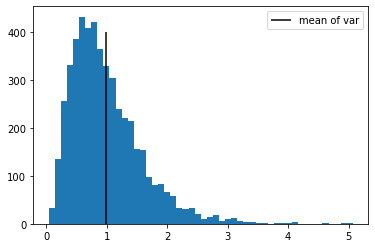

In [14]:
plt.hist(temp_var_5000, bins = 50)
plt.vlines(np.mean(temp_var_5000), ymin = 0, ymax = 400,label = "mean of var")
plt.legend()
plt.show()

#### Σχόλια:

- Αρχικά παρατηρούμε ότι για ένα τύχαιο realization τα temporal average και temporal variance είναι αρκετά κοντά στα ensemble average και ensemble variance τα οποία με τη σειρά τους είναι πολύ κοντά στη θεωρητική τιμή τους.

- Στη συνέχεια για να έχουμε καλύτερη εποπτεία του φαινομένου φτιάχνουμε το ιστόγραμμα των τιμών για να δούμε την κατανομή τους και επιβεβαιώνουμε την υπόθεση μας.

- To παραπάνω φαινόμενο επαληθεύεται και θεωρητικά καθώς η Spectral Representation Method παράγει εργοδικές διαδικασίες ως προς το mean και το autocorrelation. Η ιδιότητα της εργοδικότητας είναι που παρατηρείται σε αυτό το ερώτημα